### Podstawy przetwarzania dużych zbiorów danych - poziom 2 misje podstawowe
#### Paulina Szczepaniak 247798
#### Jan Gluźniewicz 247665

In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [222]:
df = pd.read_csv('df_merged_world_countries.csv')
df

,country_name,location_key,country_code,population,gdp_usd,area_sq_km,date,new_confirmed,cumulative_confirmed,new_deceased,...,area_sq_km_2,density_sq_km,growth_rate,world_population_percentage,gdp_in_1995,gdp_in_2000,gdp_in_2005,gdp_in_2010,gdp_in_2015,gdp_in_2016
0,Australia,AU,AUS,25499881,1.392681e+12,7741220,2022-01-18,72860.0,1836671.0,78.0,...,7692024,3.4032,1.0099,0.33,3.683917e+11,4.154462e+11,6.937641e+11,1.142877e+12,1.345383e+12,1.204616e+12
1,South Africa,ZA,ZAF,59308690,3.514316e+11,1219090,2022-01-02,3076.0,3475512.0,84.0,...,1221037,49.0517,1.0084,0.75,1.554603e+11,1.363619e+11,2.576714e+11,3.752981e+11,3.176107e+11,2.954562e+11
2,Peru,PE,PER,29381884,2.268481e+11,1285220,2021-03-30,10539.0,1577076.0,748.0,...,1285216,26.4933,1.0099,0.43,5.331279e+10,5.174475e+10,7.606061e+10,1.475289e+11,1.892121e+11,1.922073e+11
3,United States of America,US,USA,331002647,2.137442e+13,9831510,2021-09-08,167791.0,39489769.0,2068.0,...,9372610,36.0935,1.0038,4.24,7.664060e+12,1.028478e+13,1.309373e+13,1.496437e+13,1.812071e+13,1.862448e+13
4,Ethiopia,ET,ETH,114963583,9.610766e+10,1104300,2021-11-10,459.0,368106.0,22.0,...,1104300,111.7268,1.0257,1.55,7.663985e+09,8.242392e+09,1.240114e+10,2.993379e+10,6.446455e+10,7.237422e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227925,Croatia,HR,HRV,4076246,6.091759e+10,56590,2022-08-28,59.0,1211979.0,15.0,...,56594,71.2153,0.9927,0.05,2.238756e+10,2.177427e+10,4.541636e+10,5.966543e+10,4.892188e+10,5.071496e+10
227926,Austria,AT,AUT,8858775,4.551400e+11,83879,2022-07-27,9019.0,4756351.0,15.0,...,83871,106.5877,1.0020,0.11,2.410383e+11,1.967998e+11,3.159744e+11,3.918927e+11,3.820659e+11,3.908000e+11
227927,Argentina,AR,ARG,44938712,4.496634e+11,2780400,2021-10-10,382.0,5289547.0,15.0,...,2780400,16.3683,1.0052,0.57,2.580318e+11,2.842038e+11,1.987371e+11,4.236274e+11,5.847115e+11,5.454761e+11
227928,Sweden,SE,SWE,10230185,5.560253e+11,447430,2021-03-16,6786.0,731890.0,15.0,...,450295,23.4276,1.0079,0.13,2.640520e+11,2.598020e+11,3.890423e+11,4.883777e+11,4.979181e+11,5.144600e+11


In [223]:
kolumny = df.columns.tolist()  # Pobranie listy kolumn

print(kolumny)

['country_name', 'location_key', 'country_code', 'population', 'gdp_usd', 'area_sq_km', 'date', 'new_confirmed', 'cumulative_confirmed', 'new_deceased', 'cumulative_deceased', 'new_persons_vaccinated', 'cumulative_persons_vaccinated', 'new_tested', 'cumulative_tested', 'rank', 'country_territory_name', 'capital', 'continent', '2022_population', '2020_population', '2015_population', '2010_population', '2000_population', '1990_population', '1980_population', '1970_population', 'area_sq_km_2', 'density_sq_km', 'growth_rate', 'world_population_percentage', 'gdp_in_1995', 'gdp_in_2000', 'gdp_in_2005', 'gdp_in_2010', 'gdp_in_2015', 'gdp_in_2016']


### Część 1

##### Wartości odstające to wartości, które różnią się znacząco od większości danych w zbiorze. Mogą one wpłynąć na analizę danych, szczególnie na statystyki opisowe, takie jak średnia czy mediana. 

##### Pamiętaj o czytelności wykresów (tytuł wykresu, podpisy osi, odpowiednie zakresy osi, itp.). Przeanalizuj otrzymane wizualizacje. 

##### Wykonaj wykresy pudełkowe (ang.box plot), które pozwolą na graficzną identyfikację wartości odstających poprzez przedstawienie kwartyli i wartości skrajnych w danych dotyczących:

##### 1.1. liczby nowych zachorowań

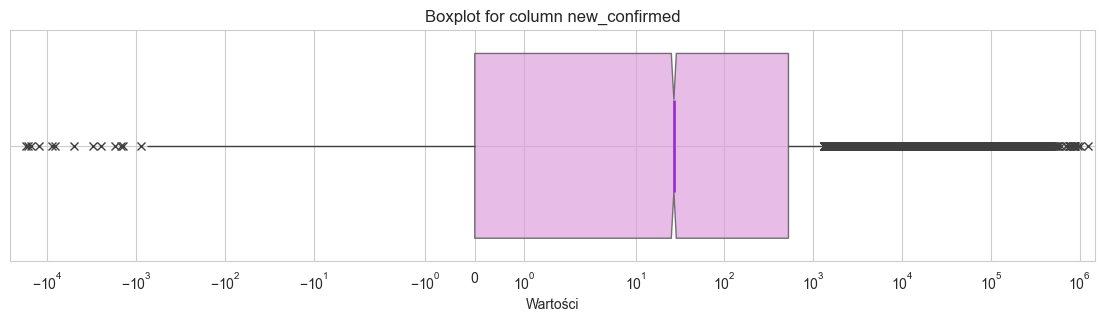

In [224]:
plt.figure(figsize=(14, 3))
sns.boxplot(x=df['new_confirmed'], notch=True, showcaps=False, flierprops={"marker": "x"}, boxprops={"facecolor": "plum", "alpha": 0.7}, medianprops={"color": "darkorchid", "linewidth": 2})
plt.title(f"Boxplot for column new_confirmed")
plt.xlabel("Wartości")
plt.xlim(df['new_confirmed'].min() * 0.8, df['new_confirmed'].max() * 1.2)
plt.grid(True)
plt.xscale("symlog")
plt.show()

##### 1.2. liczby nowych śmierci

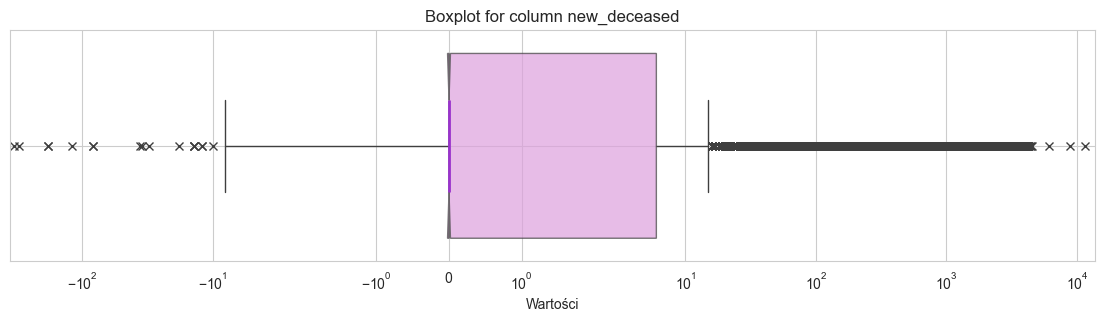

In [225]:
plt.figure(figsize=(14, 3))
sns.boxplot(x=df['new_deceased'], notch=True, showcaps=True, flierprops={"marker": "x"}, boxprops={"facecolor": "plum", "alpha": 0.7}, medianprops={"color": "darkorchid", "linewidth": 2})
plt.title(f"Boxplot for column new_deceased")
plt.xlabel("Wartości")
plt.xlim(df['new_deceased'].min() * 0.8, df['new_deceased'].max() * 1.2)
plt.grid(True)
plt.xscale("symlog")
plt.show()

##### 1.3. liczby nowych szczepień

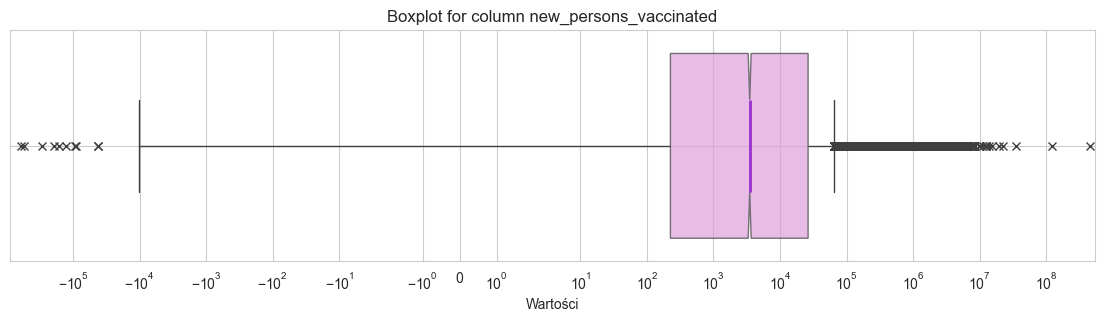

In [226]:
plt.figure(figsize=(14, 3))
sns.boxplot(x=df['new_persons_vaccinated'], notch=True, showcaps=True, flierprops={"marker": "x"}, boxprops={"facecolor": "plum", "alpha": 0.7}, medianprops={"color": "darkorchid", "linewidth": 2})
plt.title(f"Boxplot for column new_persons_vaccinated")
plt.xlabel("Wartości")
plt.xlim(df['new_persons_vaccinated'].min() * 0.8, df['new_persons_vaccinated'].max() * 1.2)
plt.grid(True)
plt.xscale("symlog")
plt.show()

##### 1.4. populacji

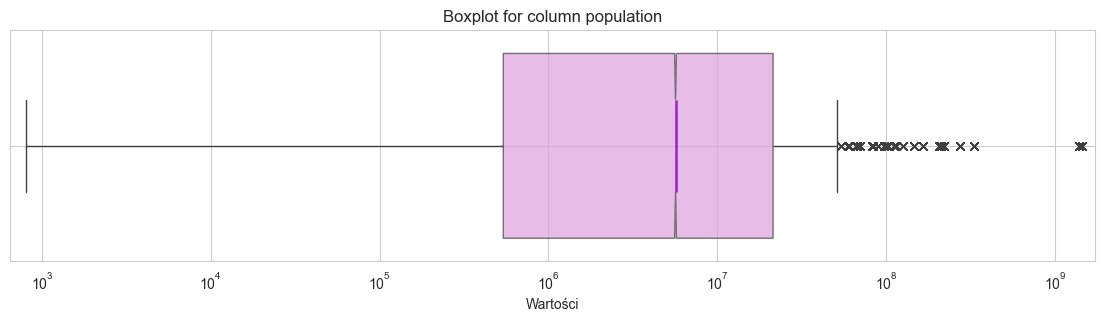

In [227]:
plt.figure(figsize=(14, 3))
sns.boxplot(x=df['population'], notch=True, showcaps=True, flierprops={"marker": "x"}, boxprops={"facecolor": "plum", "alpha": 0.7}, medianprops={"color": "darkorchid", "linewidth": 2})
plt.title(f"Boxplot for column population")
plt.xlabel("Wartości")
plt.xlim(df['population'].min() * 0.8, df['population'].max() * 1.2)
plt.grid(True)
plt.xscale("symlog")
plt.show()

##### 1.5. PKB

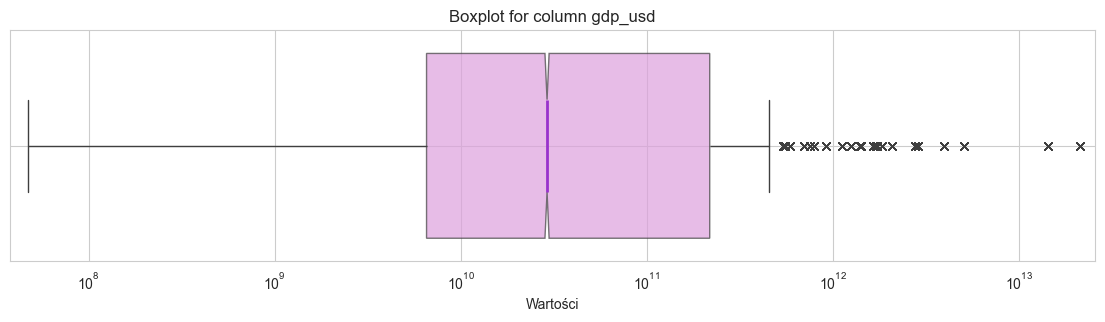

In [228]:
plt.figure(figsize=(14, 3))
sns.boxplot(x=df['gdp_usd'], notch=True, showcaps=True, flierprops={"marker": "x"}, boxprops={"facecolor": "plum", "alpha": 0.7}, medianprops={"color": "darkorchid", "linewidth": 2})
plt.title(f"Boxplot for column gdp_usd")
plt.xlabel("Wartości")
plt.xlim(df['gdp_usd'].min() * 0.8, df['gdp_usd'].max() * 1.2)
plt.grid(True)
plt.xscale("symlog")
plt.show()

##### 1.6. 4 innych różnych informacji, które uznasz za istotne

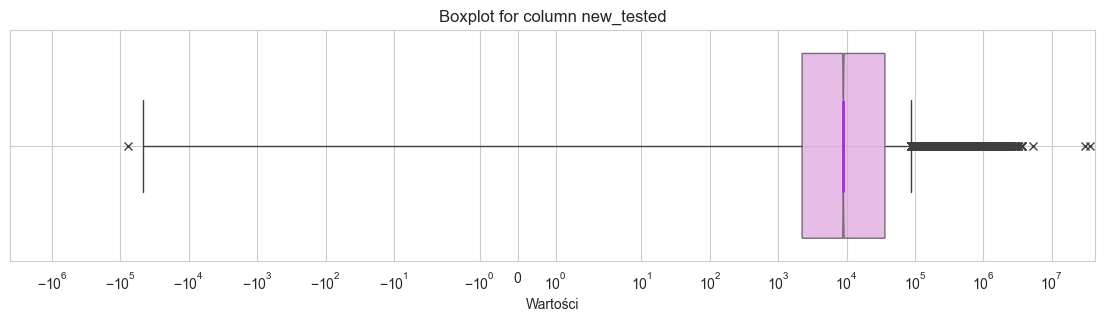

In [229]:
plt.figure(figsize=(14, 3))
sns.boxplot(x=df['new_tested'], notch=True, showcaps=True, flierprops={"marker": "x"}, boxprops={"facecolor": "plum", "alpha": 0.7}, medianprops={"color": "darkorchid", "linewidth": 2})
plt.title(f"Boxplot for column new_tested")
plt.xlabel("Wartości")
plt.xlim(df['new_tested'].min() * 0.8, df['new_tested'].max() * 1.2)
plt.grid(True)
plt.xscale("symlog")
plt.show()

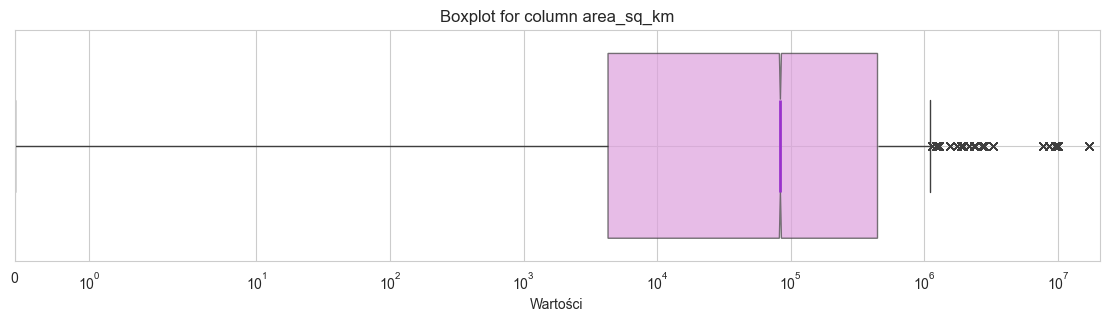

In [230]:
plt.figure(figsize=(14, 3))
sns.boxplot(x=df['area_sq_km'], notch=True, showcaps=True, flierprops={"marker": "x"}, boxprops={"facecolor": "plum", "alpha": 0.7}, medianprops={"color": "darkorchid", "linewidth": 2})
plt.title(f"Boxplot for column area_sq_km")
plt.xlabel("Wartości")
plt.xlim(df['area_sq_km'].min() * 0.8, df['area_sq_km'].max() * 1.2)
plt.grid(True)
plt.xscale("symlog")
plt.show()

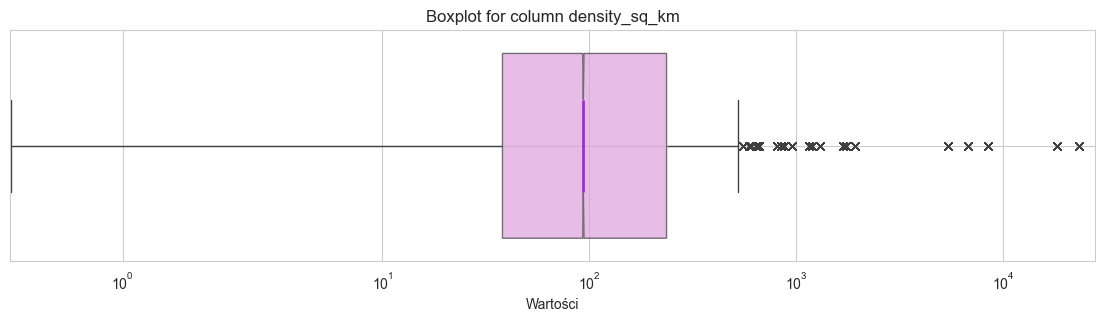

In [231]:
plt.figure(figsize=(14, 3))
sns.boxplot(x=df['density_sq_km'], notch=True, showcaps=True, flierprops={"marker": "x"}, boxprops={"facecolor": "plum", "alpha": 0.7}, medianprops={"color": "darkorchid", "linewidth": 2})
plt.title(f"Boxplot for column density_sq_km")
plt.xlabel("Wartości")
plt.xlim(df['density_sq_km'].min() * 0.8, df['density_sq_km'].max() * 1.2)
plt.grid(True)
plt.xscale("symlog")
plt.show()

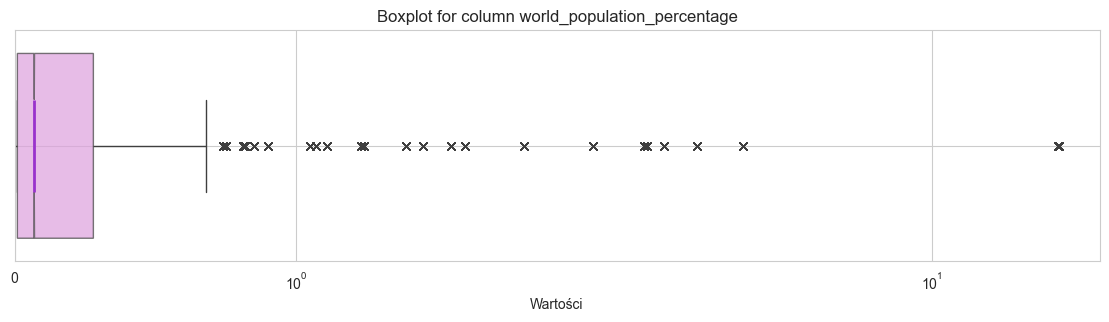

In [232]:
plt.figure(figsize=(14, 3))
sns.boxplot(x=df['world_population_percentage'], notch=True, showcaps=True, flierprops={"marker": "x"}, boxprops={"facecolor": "plum", "alpha": 0.7}, medianprops={"color": "darkorchid", "linewidth": 2})
plt.title(f"Boxplot for column world_population_percentage")
plt.xlabel("Wartości")
plt.xlim(df['world_population_percentage'].min() * 0.8, df['world_population_percentage'].max() * 1.2)
plt.grid(True)
plt.xscale("symlog")
plt.show()

### Część 3

##### Obliczenia statystyczne (m.in. średnia, mediana, moda, odchylenie standardowe) pozwolają na zrozumienie rozkładu danych oraz na identyfikację ewentualnych anomalii lub nietypowych wartości. 

##### Wykonaj następujące obliczenia:

In [233]:
selected_countries = ['Poland', 'Germany', 'Italy', 'France', 'Spain', 'United Kingdom', 'United States of America', 'Greece', 'Austria', 'Japan']
selected_columns = ['new_confirmed', 'new_deceased', 'new_persons_vaccinated']
selected_year = 2021
selected_month = 3

df['date'] = pd.to_datetime(df['date'])
df_base = df[(df['country_name'].isin(selected_countries)) & (df['date'].dt.year == selected_year) & (df['date'].dt.month == selected_month)]

##### 3.1. średnia liczba nowych zachorowań, śmierci i szczepień dla co najmniej 10 wybranych krajów w wybranym miesiącu

In [234]:
mean_per_country = df_base.groupby('country_name')[selected_columns].mean()

mean_per_country = mean_per_country.rename(columns={
    'new_confirmed': 'new_confirmed_mean', 
    'new_deceased': 'new_deceased_mean', 
    'new_persons_vaccinated': 'new_persons_vaccinated_mean'
})
mean_per_country['new_persons_vaccinated_mean'] = mean_per_country['new_persons_vaccinated_mean'].map('{:.6f}'.format)
print(mean_per_country.to_string())

                          new_confirmed_mean  new_deceased_mean new_persons_vaccinated_mean
country_name                                                                               
Austria                          2811.741935          31.451613                25854.838710
France                          28659.838710         297.161290               184449.709677
Germany                         13254.645161         189.290323               187529.322581
Greece                           2416.193548          52.451613                19276.259259
Italy                           20909.677419         375.709677               133815.516129
Japan                            1364.516129          41.096774                36896.913043
Poland                          20777.161290         316.677419                67051.935484
Spain                            5413.838710          96.580645               130783.761905
United Kingdom                   5445.516129          95.838710               35

##### 3.2. średnia zmiana liczby zachorowań, śmierci i szczepień dla co najmniej 10 wybranych krajów w wybranym miesiącu

##### 3.3. mediana liczby nowych zachorowań, śmierci i szczepień dla co najmniej 10 wybranych krajów w wybranym miesiącu

In [235]:
median_per_country = df_base.groupby('country_name')[selected_columns].median()

median_per_country = median_per_country.rename(columns={
    'new_confirmed': 'new_confirmed_median', 
    'new_deceased': 'new_deceased_median', 
    'new_persons_vaccinated': 'new_persons_vaccinated_median'
})

median_per_country['new_persons_vaccinated_median'] = median_per_country['new_persons_vaccinated_median'].round(3)
print(median_per_country.to_string())

                          new_confirmed_median  new_deceased_median  new_persons_vaccinated_median
country_name                                                                                      
Austria                                 2782.0                 32.0                        25154.0
France                                 27166.0                287.0                       172457.0
Germany                                12553.0                195.0                       190319.0
Greece                                  2503.0                 52.0                        20914.0
Italy                                  21315.0                376.0                       136825.0
Japan                                   1309.0                 41.0                        38731.0
Poland                                 18775.0                349.0                        60675.0
Spain                                   5701.0                 93.0                       107709.0
United Kin

##### 3.4. odchylenie standardowe liczby nowych zachorowań, śmierci i szczepień dla co najmniej 10 wybranych krajów w wybranym miesiącu

In [236]:
std_per_country = df_base.groupby('country_name')[selected_columns].std()

std_per_country = std_per_country.rename(columns={
    'new_confirmed': 'new_confirmed_std', 
    'new_deceased': 'new_deceased_std',
    'new_persons_vaccinated': 'new_persons_vaccinated_std', 
    
})

std_per_country['new_persons_vaccinated_std'] = std_per_country['new_persons_vaccinated_std'].map('{:.6f}'.format)
print(std_per_country.to_string())

                          new_confirmed_std  new_deceased_std new_persons_vaccinated_std
country_name                                                                            
Austria                          473.535846          5.233474               11005.539130
France                         13889.657647        143.841370               79857.145877
Germany                         5762.387593         61.747979               46521.988032
Greece                           833.049515         12.722261                7799.308611
Italy                           4048.393289         81.696672               38283.760567
Japan                            487.515461         13.419774               22961.628907
Poland                          8242.963921        171.810242               42214.242867
Spain                           1866.347022         26.068850               81577.812594
United Kingdom                   994.547196         50.489007              131595.263496
United States of Amer

##### 3.5. minimalna, średnia i maksymalna liczba nowych zachorowań, szczepień i śmierci, a PKB co najmniej 10 wybranych krajów

In [237]:
selected_columns_with_gdp = ['new_confirmed', 'new_deceased', 'new_persons_vaccinated']

stats_with_gdp = df_base.groupby('country_name')[selected_columns_with_gdp].agg(['min', 'mean', 'max'])
gdp_per_country = df[['country_name','gdp_usd']].drop_duplicates()

stats_with_gdp.columns = [
    'new_confirmed_min', 'new_confirmed_mean', 'new_confirmed_max',
    'new_deceased_min', 'new_deceased_mean', 'new_deceased_max',
    'new_vaccinated_min', 'new_vaccinated_mean', 'new_vaccinated_max'
]

stats_with_gdp = stats_with_gdp.merge(gdp_per_country, on='country_name', how='left')
stats_with_gdp['gdp_usd'] = stats_with_gdp['gdp_usd'].map('{:.0f}'.format)
stats_with_gdp['new_vaccinated_mean'] = stats_with_gdp['new_vaccinated_mean'].map('{:.6f}'.format)

stats_with_gdp

,country_name,new_confirmed_min,new_confirmed_mean,new_confirmed_max,new_deceased_min,new_deceased_mean,new_deceased_max,new_vaccinated_min,new_vaccinated_mean,new_vaccinated_max,gdp_usd
0,Austria,1904.0,2811.741935,3639.0,22.0,31.451613,43.0,8156.0,25854.838710,53736.0,455140042000
1,France,4703.0,28659.838710,65373.0,130.0,297.161290,897.0,49942.0,184449.709677,358804.0,2776646200000
2,Germany,3363.0,13254.645161,23994.0,75.0,189.290323,302.0,111224.0,187529.322581,285763.0,3946356600000
3,Greece,1134.0,2416.193548,4322.0,23.0,52.451613,76.0,116.0,19276.259259,28724.0,217962048000
4,Italy,12916.0,20909.677419,26824.0,207.0,375.709677,551.0,66920.0,133815.516129,211504.0,2083196780000
5,Japan,599.0,1364.516129,2832.0,22.0,41.096774,68.0,1871.0,36896.913043,73352.0,5081769542379
6,Poland,6170.0,20777.161290,35251.0,28.0,316.677419,653.0,7572.0,67051.935484,170070.0,585705873800
7,Spain,1991.0,5413.838710,9063.0,63.0,96.580645,153.0,38789.0,130783.761905,405701.0,1418587740000
8,United Kingdom,3731.0,5445.516129,7192.0,34.0,95.838710,224.0,164143.0,350709.451613,752308.0,2860009176200
9,United States of America,39828.0,54007.290323,70589.0,491.0,971.451613,1872.0,646974.0,1694514.741935,2403238.0,21374418877706


##### 3.6. minimalna, średnia i maksymalna liczba nowych zachorowań, szczepień i śmierci, a populacja co najmniej 10 wybranych krajów.

In [238]:
selected_columns_with_gdp = ['new_confirmed', 'new_deceased', 'new_persons_vaccinated']

stats_with_population = df_base.groupby('country_name')[selected_columns_with_gdp].agg(['min', 'mean', 'max'])
population_per_country = df[['country_name','population']].drop_duplicates()

stats_with_population.columns = [
    'new_confirmed_min', 'new_confirmed_mean', 'new_confirmed_max',
    'new_deceased_min', 'new_deceased_mean', 'new_deceased_max',
    'new_vaccinated_min', 'new_vaccinated_mean', 'new_vaccinated_max'
]

stats_with_population = stats_with_population.merge(population_per_country, on='country_name', how='left')
stats_with_population['population'] = stats_with_population['population'].map('{:.0f}'.format)
stats_with_population['new_vaccinated_mean'] = stats_with_population['new_vaccinated_mean'].map('{:.6f}'.format)

stats_with_population

,country_name,new_confirmed_min,new_confirmed_mean,new_confirmed_max,new_deceased_min,new_deceased_mean,new_deceased_max,new_vaccinated_min,new_vaccinated_mean,new_vaccinated_max,population
0,Austria,1904.0,2811.741935,3639.0,22.0,31.451613,43.0,8156.0,25854.838710,53736.0,8858775
1,France,4703.0,28659.838710,65373.0,130.0,297.161290,897.0,49942.0,184449.709677,358804.0,67012883
2,Germany,3363.0,13254.645161,23994.0,75.0,189.290323,302.0,111224.0,187529.322581,285763.0,83019213
3,Greece,1134.0,2416.193548,4322.0,23.0,52.451613,76.0,116.0,19276.259259,28724.0,10724599
4,Italy,12916.0,20909.677419,26824.0,207.0,375.709677,551.0,66920.0,133815.516129,211504.0,60359546
5,Japan,599.0,1364.516129,2832.0,22.0,41.096774,68.0,1871.0,36896.913043,73352.0,126476458
6,Poland,6170.0,20777.161290,35251.0,28.0,316.677419,653.0,7572.0,67051.935484,170070.0,37972812
7,Spain,1991.0,5413.838710,9063.0,63.0,96.580645,153.0,38789.0,130783.761905,405701.0,46937060
8,United Kingdom,3731.0,5445.516129,7192.0,34.0,95.838710,224.0,164143.0,350709.451613,752308.0,66647112
9,United States of America,39828.0,54007.290323,70589.0,491.0,971.451613,1872.0,646974.0,1694514.741935,2403238.0,331002647


##### Przygotuj wykresy w celu porównania otrzymanych wyników. Pamiętaj o ich czytelności (typ wykresu, tytuł wykresu, podpisy osi, odpowiednie zakresy osi, itp.). Przeanalizuj otrzymane wizualizacje.

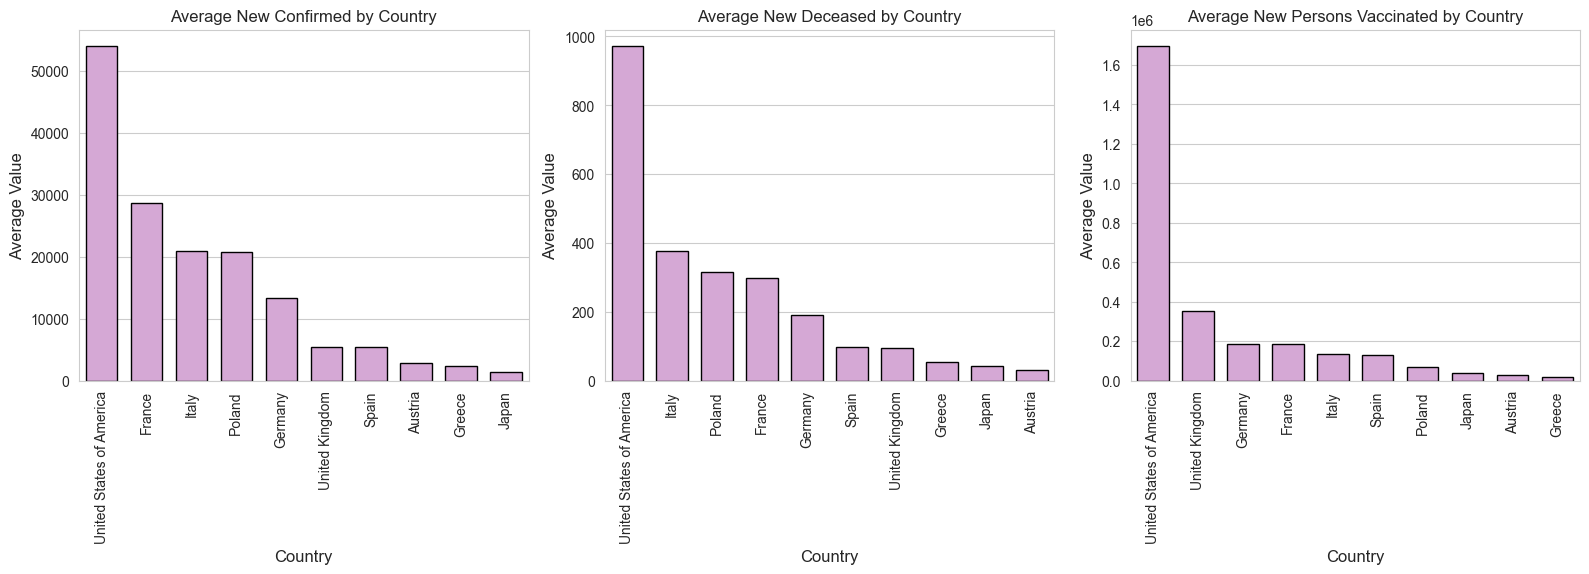

In [239]:
plt.figure(figsize=(16, 6))

for i, column in enumerate(selected_columns, 1):
    plt.subplot(1, 3, i)
    country_avg = df_base.groupby('country_name')[column].mean().sort_values(ascending=False)
    
    sns.barplot(x=country_avg.index, 
                y=country_avg.values, 
                color='plum', 
                edgecolor='black', 
                width=0.7)
    
    plt.xticks(rotation=90, fontsize=10)
    plt.yticks(fontsize=10)
    plt.title(f'Average {column.replace("_", " ").title()} by Country', fontsize=12)
    plt.xlabel('Country', fontsize=12)
    plt.ylabel('Average Value', fontsize=12)

plt.tight_layout()
plt.show()


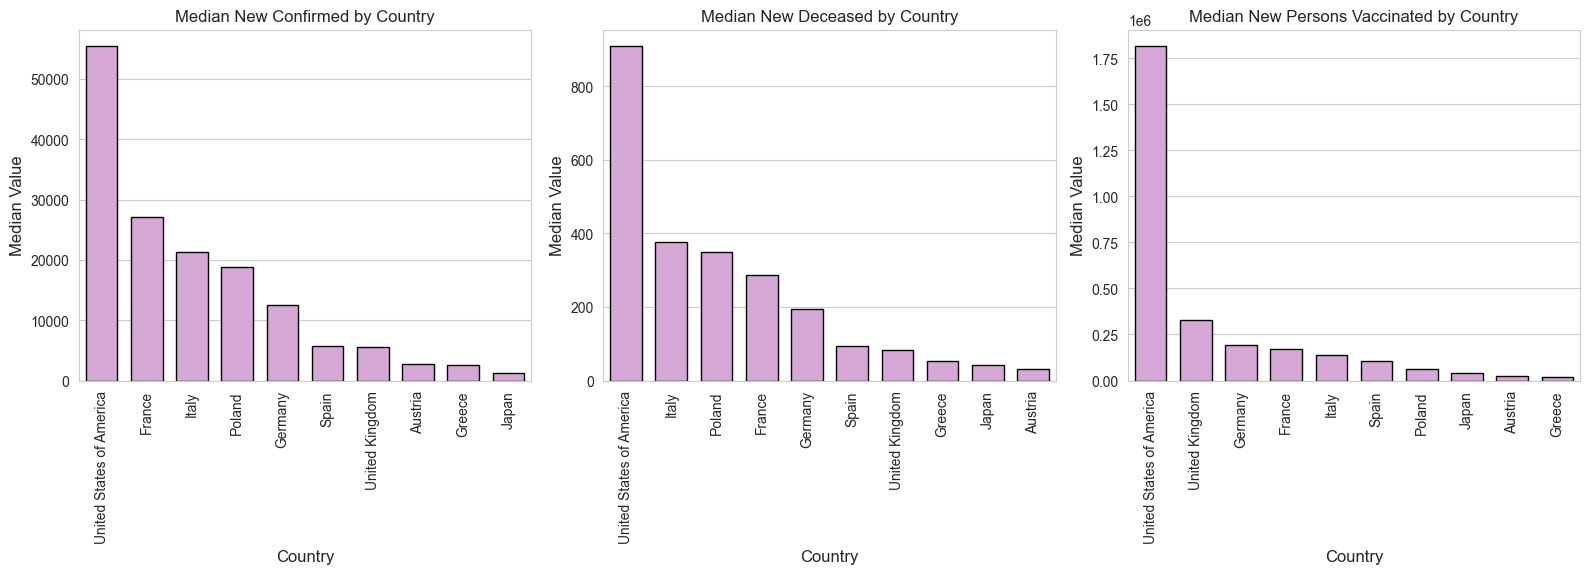

In [240]:
plt.figure(figsize=(16, 6))

for i, column in enumerate(selected_columns, 1):
    plt.subplot(1, 3, i)
    
    country_median = df_base.groupby('country_name')[column].median().sort_values(ascending=False)
    
    sns.barplot(x=country_median.index, 
                y=country_median.values, 
                color='plum', 
                edgecolor='black', 
                width=0.7)
    
    plt.xticks(rotation=90, fontsize=10)
    plt.yticks(fontsize=10)
    plt.title(f'Median {column.replace("_", " ").title()} by Country', fontsize=12)
    plt.xlabel('Country', fontsize=12)
    plt.ylabel('Median Value', fontsize=12)

plt.tight_layout()
plt.show()


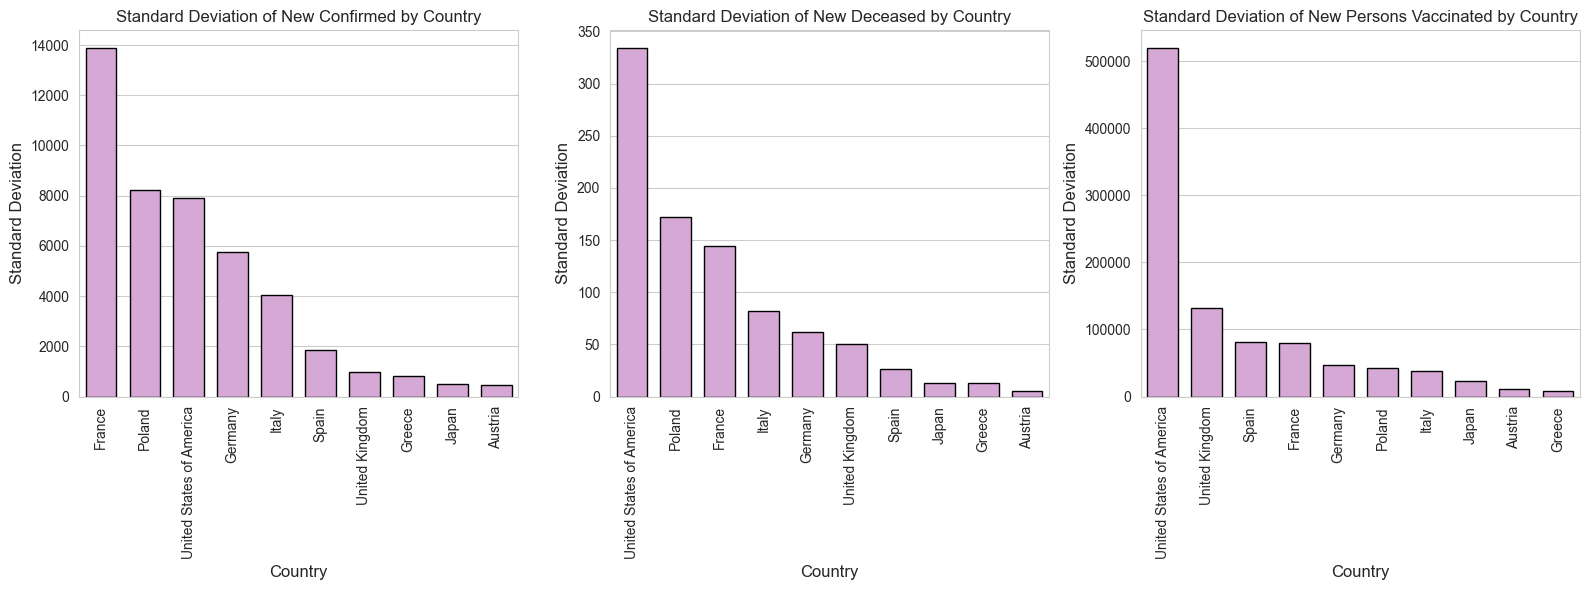

In [241]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 6))

for i, column in enumerate(selected_columns, 1):
    plt.subplot(1, 3, i)

    country_std = df_base.groupby('country_name')[column].std().sort_values(ascending=False)
    
    sns.barplot(x=country_std.index, 
                y=country_std.values, 
                color='plum', 
                edgecolor='black', 
                width=0.7)
    
    plt.xticks(rotation=90, fontsize=10)
    plt.yticks(fontsize=10)
    plt.title(f'Standard Deviation of {column.replace("_", " ").title()} by Country', fontsize=12)
    plt.xlabel('Country', fontsize=12)
    plt.ylabel('Standard Deviation', fontsize=12)

plt.tight_layout()
plt.show()


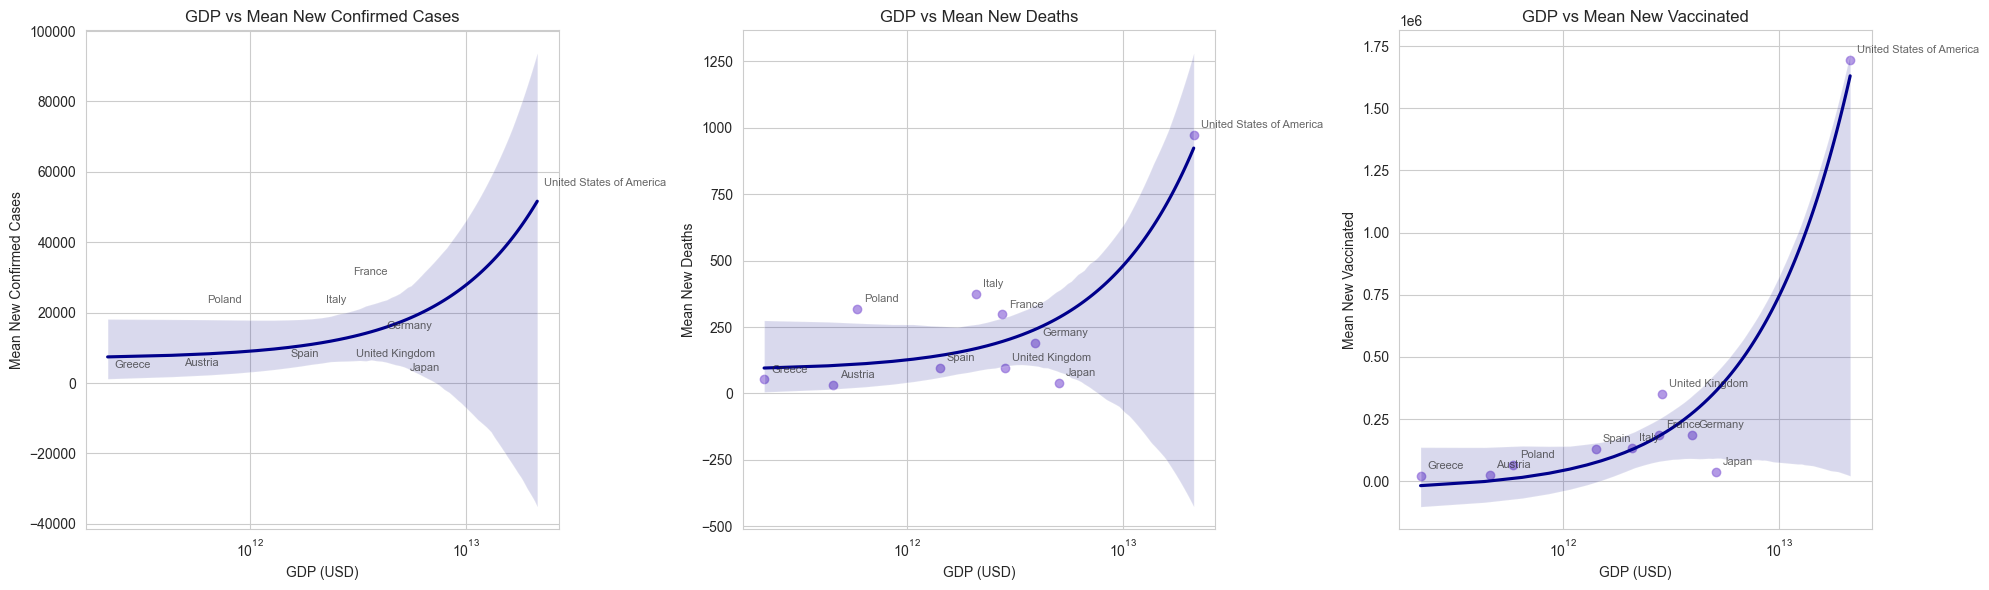

In [261]:
stats_with_gdp['gdp_usd_numeric'] = stats_with_gdp['gdp_usd'].str.replace(',', '').astype(float)

plt.figure(figsize=(20, 6))

# 1. GDP vs New Confirmed Cases
plt.subplot(1, 3, 1)
sns.regplot(x='gdp_usd_numeric', y='new_confirmed_mean', 
            data=stats_with_gdp, color='mediumpurple', scatter_kws={'alpha':0.7}, line_kws={'color': 'darkblue'})

for idx, row in stats_with_gdp.iterrows():
    plt.annotate(row['country_name'], 
                 (row['gdp_usd_numeric'], row['new_confirmed_mean']),
                 xytext=(5, 5), textcoords='offset points', fontsize=8, alpha=0.7)
plt.title('GDP vs Mean New Confirmed Cases')
plt.xlabel('GDP (USD)')
plt.ylabel('Mean New Confirmed Cases')
plt.xscale('log')

# 2. GDP vs New Deceased
plt.subplot(1, 3, 2)
stats_with_gdp['new_deceased_mean_numeric'] = pd.to_numeric(stats_with_gdp['new_deceased_mean'], errors='coerce')
sns.regplot(x='gdp_usd_numeric', y='new_deceased_mean_numeric', 
            data=stats_with_gdp, color='mediumpurple', scatter_kws={'alpha':0.7}, line_kws={'color': 'darkblue'})

for idx, row in stats_with_gdp.iterrows():
    plt.annotate(row['country_name'], 
                 (row['gdp_usd_numeric'], row['new_deceased_mean_numeric']),
                 xytext=(5, 5), textcoords='offset points', fontsize=8, alpha=0.7)
plt.title('GDP vs Mean New Deaths')
plt.xlabel('GDP (USD)')
plt.ylabel('Mean New Deaths')
plt.xscale('log')

# 3. GDP vs New Vaccinated
plt.subplot(1, 3, 3)
stats_with_gdp['new_vaccinated_mean_numeric'] = pd.to_numeric(stats_with_gdp['new_vaccinated_mean'], errors='coerce')
sns.regplot(x='gdp_usd_numeric', y='new_vaccinated_mean_numeric', 
            data=stats_with_gdp, color='mediumpurple', scatter_kws={'alpha':0.7}, line_kws={'color': 'darkblue'})

for idx, row in stats_with_gdp.iterrows():
    plt.annotate(row['country_name'], 
                 (row['gdp_usd_numeric'], row['new_vaccinated_mean_numeric']),
                 xytext=(5, 5), textcoords='offset points', fontsize=8, alpha=0.7)
plt.title('GDP vs Mean New Vaccinated')
plt.xlabel('GDP (USD)')
plt.ylabel('Mean New Vaccinated')
plt.xscale('log')

plt.tight_layout()
plt.show()

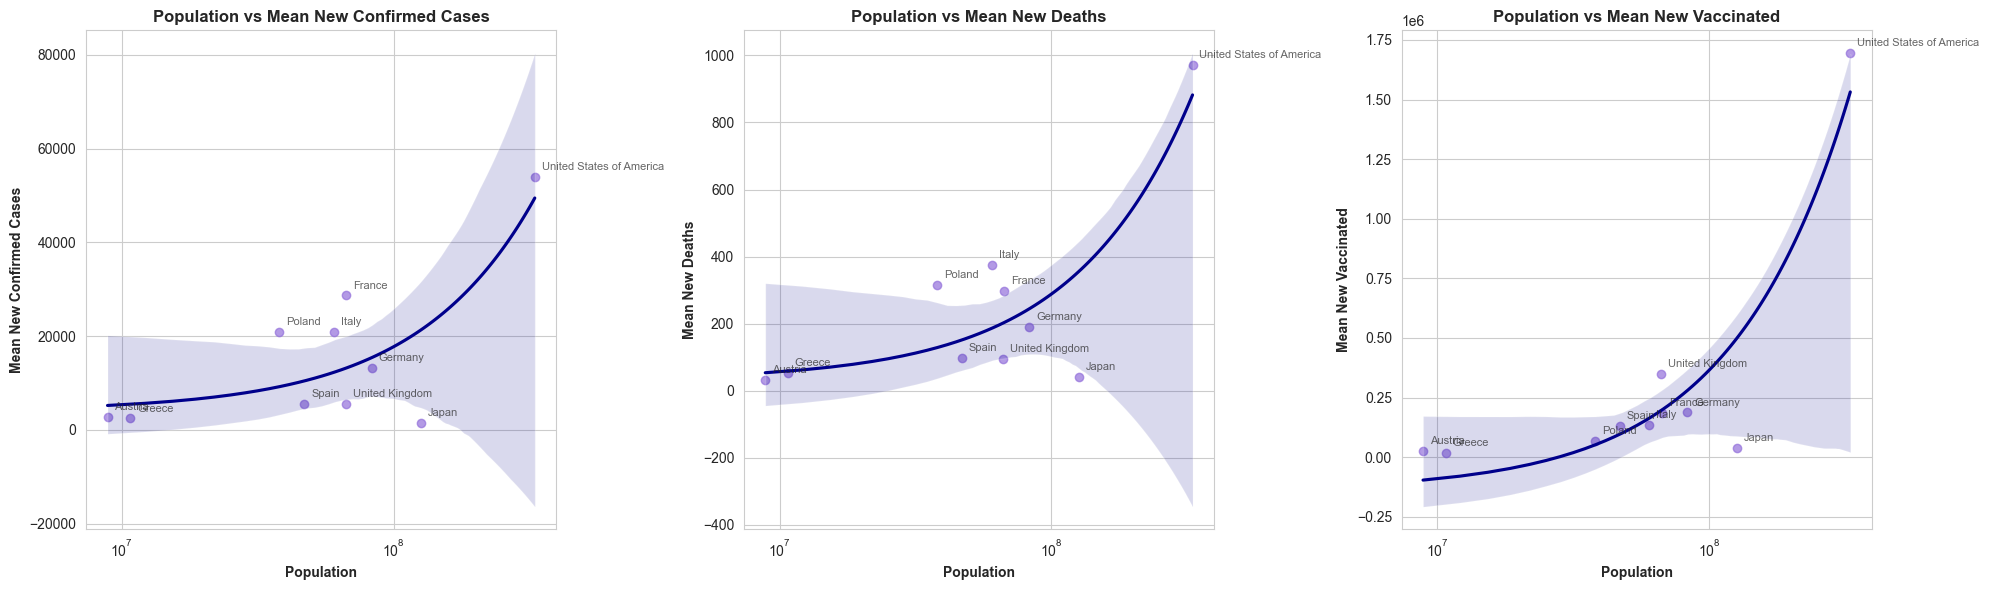

In [243]:
stats_with_population = df_base.groupby('country_name')['population'].mean()

plt.figure(figsize=(20, 6))

# 1. Population vs New Confirmed Cases
plt.subplot(1, 3, 1)
sns.regplot(x=stats_with_population, y='new_confirmed_mean', 
           data=stats_with_gdp, color='mediumpurple', scatter_kws={'alpha':0.7}, line_kws={'color': 'darkblue'})

for idx, row in stats_with_gdp.iterrows():
   plt.annotate(row['country_name'], 
                (stats_with_population[row['country_name']], row['new_confirmed_mean']),
                xytext=(5, 5), textcoords='offset points', fontsize=8, alpha=0.7)
plt.title('Population vs Mean New Confirmed Cases', fontweight='bold')
plt.xlabel('Population', fontweight='bold')
plt.ylabel('Mean New Confirmed Cases', fontweight='bold')
plt.xscale('log')

# 2. Population vs New Deceased
plt.subplot(1, 3, 2)
stats_with_gdp['new_deceased_mean_numeric'] = pd.to_numeric(stats_with_gdp['new_deceased_mean'], errors='coerce')
sns.regplot(x=stats_with_population, y='new_deceased_mean_numeric', 
           data=stats_with_gdp, color='mediumpurple', scatter_kws={'alpha':0.7}, line_kws={'color': 'darkblue'})

for idx, row in stats_with_gdp.iterrows():
   plt.annotate(row['country_name'], 
                (stats_with_population[row['country_name']], row['new_deceased_mean_numeric']),
                xytext=(5, 5), textcoords='offset points', fontsize=8, alpha=0.7)
plt.title('Population vs Mean New Deaths', fontweight='bold')
plt.xlabel('Population', fontweight='bold')
plt.ylabel('Mean New Deaths', fontweight='bold')
plt.xscale('log')

# 3. Population vs New Vaccinated
plt.subplot(1, 3, 3)
stats_with_gdp['new_vaccinated_mean_numeric'] = pd.to_numeric(stats_with_gdp['new_vaccinated_mean'], errors='coerce')
sns.regplot(x=stats_with_population, y='new_vaccinated_mean_numeric', 
           data=stats_with_gdp, color='mediumpurple', scatter_kws={'alpha':0.7}, line_kws={'color': 'darkblue'})

for idx, row in stats_with_gdp.iterrows():
   plt.annotate(row['country_name'], 
                (stats_with_population[row['country_name']], row['new_vaccinated_mean_numeric']),
                xytext=(5, 5), textcoords='offset points', fontsize=8, alpha=0.7)
plt.title('Population vs Mean New Vaccinated', fontweight='bold')
plt.xlabel('Population', fontweight='bold')
plt.ylabel('Mean New Vaccinated', fontweight='bold')
plt.xscale('log')

plt.tight_layout()
plt.show()

### Część 4

##### Normalizacja danych polega na przeskalowaniu wartości zmiennych do określonego zakresu, np. [0, 1], co ułatwia porównanie różnych zmiennych między sobą.
##### Wykonaj normalizację dla następujących przypadków:
##### 4.1. liczba zachorowań na określoną przez Ciebie liczbę osób (np. na 1000 osób)

In [244]:
df['confirmed_per_1000'] = (df['cumulative_confirmed'] / df['population']) * 1000

##### 4.2. liczba szczepień na określoną przez Ciebie liczbę osób (np. na 1000 osób)

In [245]:
df['vaccinated_per_1000'] = (df['cumulative_persons_vaccinated'] / df['population']) * 1000

##### 4.3. liczba zgonów na określoną przez Ciebie liczbę osób (np. na 1000 osób)

In [246]:
df['deceased_per_1000'] = (df['cumulative_deceased'] / df['population']) * 1000

##### 4.4. co najmniej 4 dodatkowe, które uznasz za istotne

In [247]:
df['tested_per_1000'] = (df['cumulative_tested'] / df['population']) * 1000
df['gdp_usd_per_1000'] = (df['gdp_usd'] / df['population']) * 1000
df['area_sq_km_per_1000'] = (df['area_sq_km'] / df['population']) * 1000

df['gdp_per_capita'] = df['gdp_usd'] / df['population']
df['gdp_category'] = 0 # kraje słabo rozwinięte
df.loc[df['gdp_per_capita'] >= 2000, 'gdp_category'] = 1 # kraje średnio rowinięte
df.loc[df['gdp_per_capita'] >= 15000, 'gdp_category'] = 2 # kraje wysoko rozwinięte
df

,country_name,location_key,country_code,population,gdp_usd,area_sq_km,date,new_confirmed,cumulative_confirmed,new_deceased,...,gdp_in_2015,gdp_in_2016,confirmed_per_1000,vaccinated_per_1000,deceased_per_1000,tested_per_1000,gdp_usd_per_1000,area_sq_km_per_1000,gdp_per_capita,gdp_category
0,Australia,AU,AUS,25499881,1.392681e+12,7741220,2022-01-18,72860.0,1836671.0,78.0,...,1.345383e+12,1.204616e+12,72.026650,1033.816550,0.108863,2319.899767,5.461518e+07,303.578672,54615.179943,2
1,South Africa,ZA,ZAF,59308690,3.514316e+11,1219090,2022-01-02,3076.0,3475512.0,84.0,...,3.176107e+11,2.954562e+11,58.600384,319.416379,1.539606,359.208541,5.925466e+06,20.554998,5925.466390,1
2,Peru,PE,PER,29381884,2.268481e+11,1285220,2021-03-30,10539.0,1577076.0,748.0,...,1.892121e+11,1.922073e+11,53.675115,22.367660,4.907276,317.030283,7.720678e+06,43.741919,7720.677504,1
3,United States of America,US,USA,331002647,2.137442e+13,9831510,2021-09-08,167791.0,39489769.0,2068.0,...,1.812071e+13,1.862448e+13,119.303484,631.620330,1.895254,1663.591310,6.457477e+07,29.702210,64574.767215,2
4,Ethiopia,ET,ETH,114963583,9.610766e+10,1104300,2021-11-10,459.0,368106.0,22.0,...,6.446455e+10,7.237422e+10,3.201936,NaN,0.057262,NaN,8.359835e+05,9.605651,835.983534,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227925,Croatia,HR,HRV,4076246,6.091759e+10,56590,2022-08-28,59.0,1211979.0,15.0,...,4.892188e+10,5.071496e+10,297.327247,568.486789,4.090283,NaN,1.494453e+07,13.882872,14944.533377,1
227926,Austria,AT,AUT,8858775,4.551400e+11,83879,2022-07-27,9019.0,4756351.0,15.0,...,3.820659e+11,3.908000e+11,536.908433,776.720258,2.291852,21804.701440,5.137731e+07,9.468465,51377.311423,2
227927,Argentina,AR,ARG,44938712,4.496634e+11,2780400,2021-10-10,382.0,5289547.0,15.0,...,5.847115e+11,5.454761e+11,117.705799,292.017359,2.589905,407.333949,1.000615e+07,61.870932,10006.148974,1
227928,Sweden,SE,SWE,10230185,5.560253e+11,447430,2021-03-16,6786.0,731890.0,15.0,...,4.979181e+11,5.144600e+11,71.542206,NaN,1.305841,649.273107,5.435144e+07,43.736257,54351.443498,2


##### Przygotuj wykresy w celu porównania otrzymanych wyników. Pamiętaj o ich czytelności (typ wykresu, tytuł wykresu, podpisy osi, odpowiednie zakresy osi, itp.). Przeanalizuj otrzymane wizualizacje.

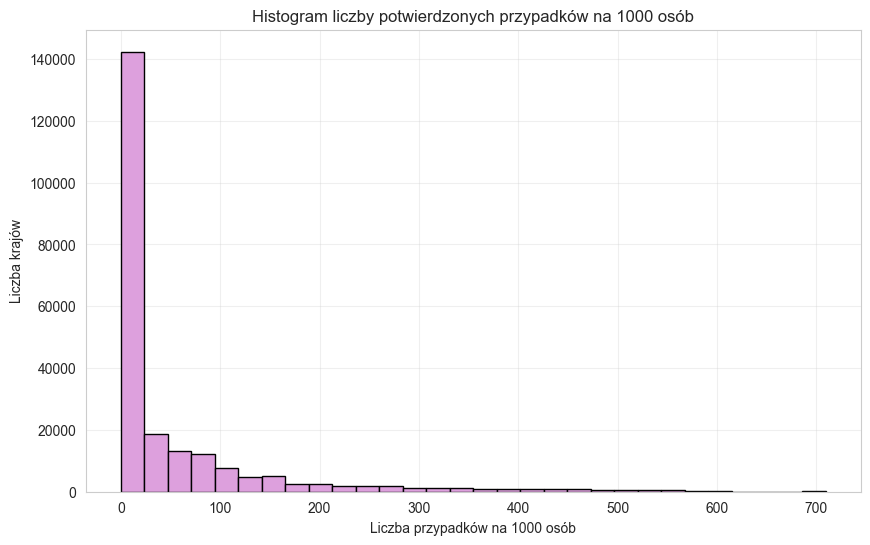

In [248]:
plt.figure(figsize=(10, 6))
plt.hist(df['confirmed_per_1000'].dropna(), bins=30, color='plum', edgecolor='black')
plt.title('Histogram liczby potwierdzonych przypadków na 1000 osób')
plt.xlabel('Liczba przypadków na 1000 osób')
plt.ylabel('Liczba krajów')
plt.grid(alpha=0.3)
plt.show()

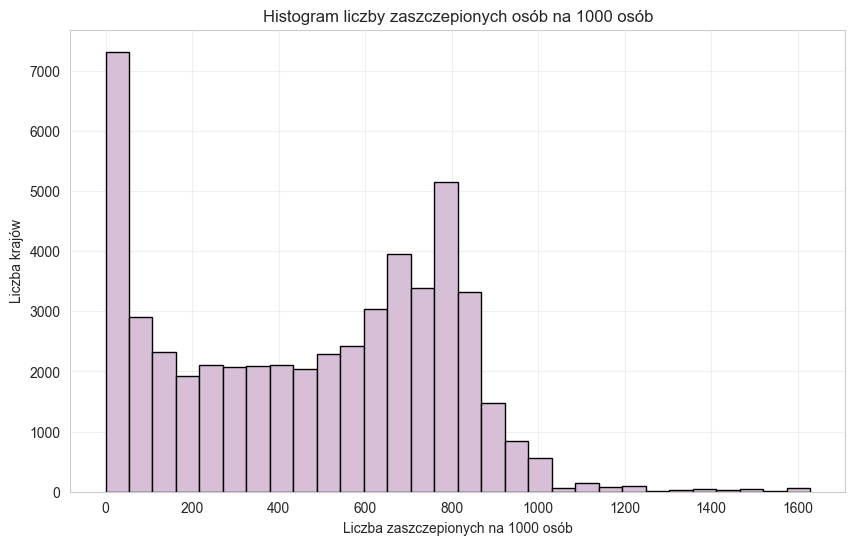

In [249]:
plt.figure(figsize=(10, 6))
plt.hist(df['vaccinated_per_1000'].dropna(), bins=30, color='thistle', edgecolor='black')
plt.title('Histogram liczby zaszczepionych osób na 1000 osób')
plt.xlabel('Liczba zaszczepionych na 1000 osób')
plt.ylabel('Liczba krajów')
plt.grid(alpha=0.3)
plt.show()

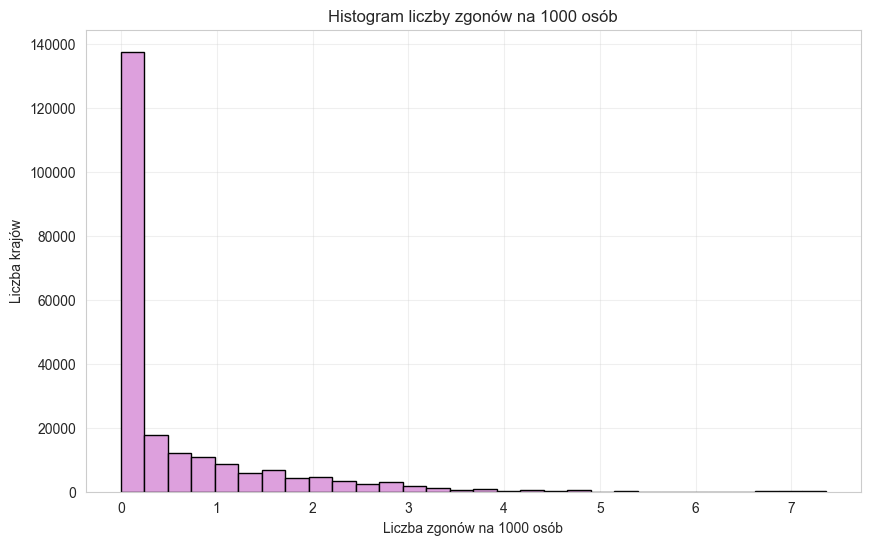

In [250]:
plt.figure(figsize=(10, 6))
plt.hist(df['deceased_per_1000'].dropna(), bins=30, color='plum', edgecolor='black')
plt.title('Histogram liczby zgonów na 1000 osób')
plt.xlabel('Liczba zgonów na 1000 osób')
plt.ylabel('Liczba krajów')
plt.grid(alpha=0.3)
plt.show()

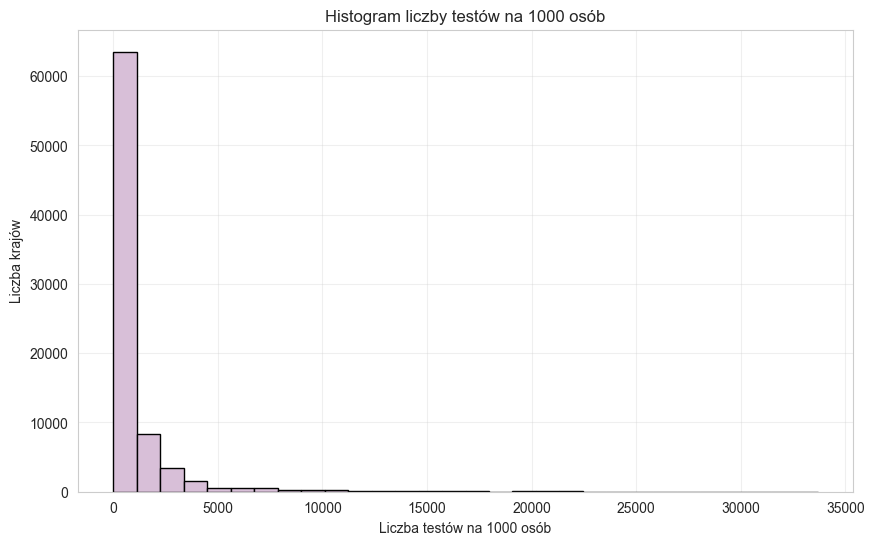

In [251]:
plt.figure(figsize=(10, 6))
plt.hist(df['tested_per_1000'].dropna(), bins=30, color='thistle', edgecolor='black')
plt.title('Histogram liczby testów na 1000 osób')
plt.xlabel('Liczba testów na 1000 osób')
plt.ylabel('Liczba krajów')
plt.grid(alpha=0.3)
plt.show()

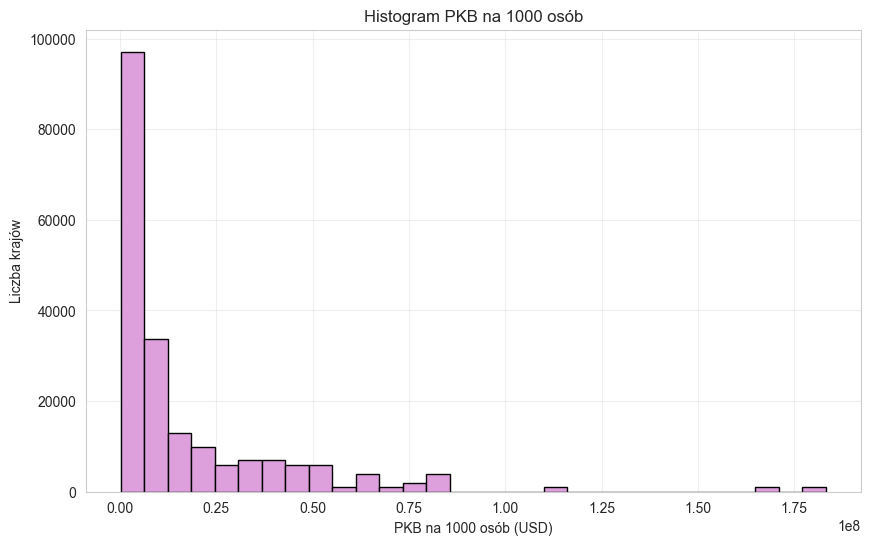

In [252]:
plt.figure(figsize=(10, 6))
plt.hist(df['gdp_usd_per_1000'].dropna(), bins=30, color='plum', edgecolor='black')
plt.title('Histogram PKB na 1000 osób')
plt.xlabel('PKB na 1000 osób (USD)')
plt.ylabel('Liczba krajów')
plt.grid(alpha=0.3)
plt.show()

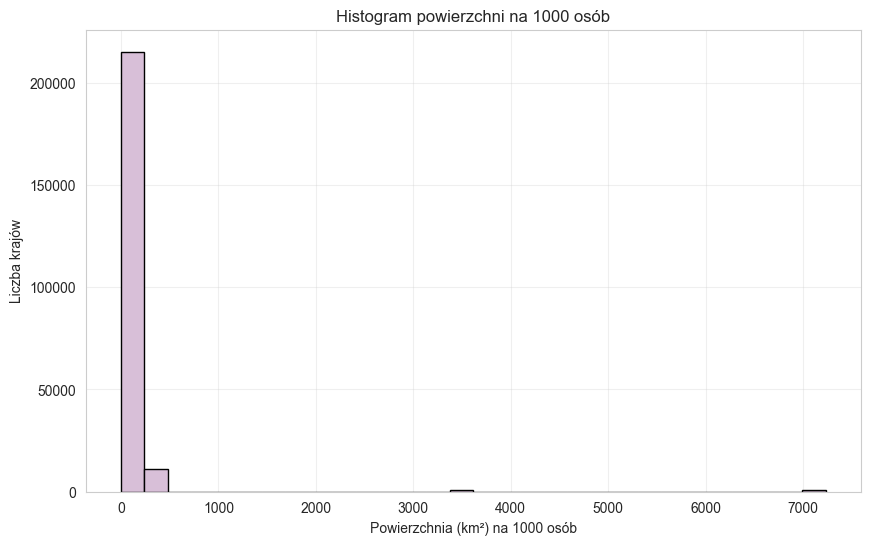

In [253]:
plt.figure(figsize=(10, 6))
plt.hist(df['area_sq_km_per_1000'].dropna(), bins=30, color='thistle', edgecolor='black')
plt.title('Histogram powierzchni na 1000 osób')
plt.xlabel('Powierzchnia (km²) na 1000 osób')
plt.ylabel('Liczba krajów')
plt.grid(alpha=0.3)
plt.show()

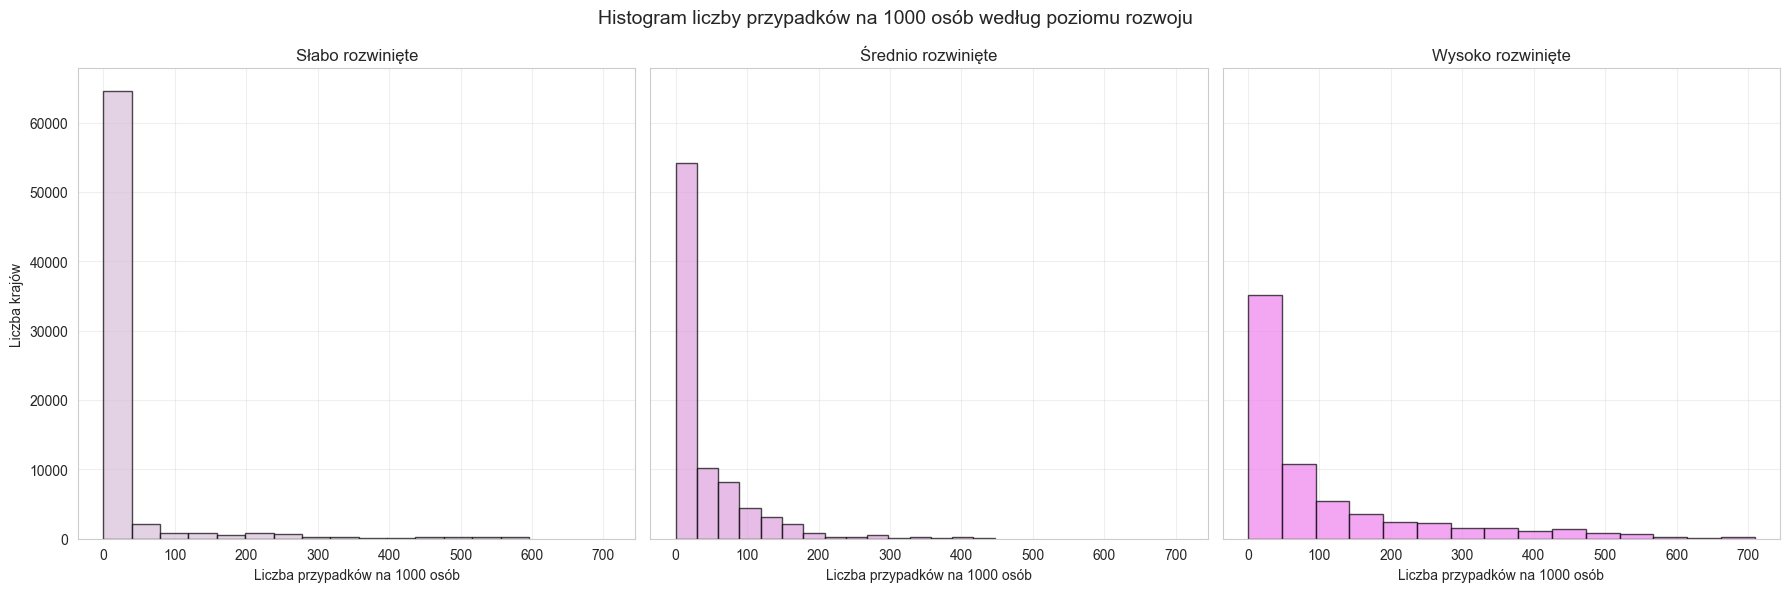

In [254]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)

colors = ['thistle', 'plum', 'violet']
labels = ['Słabo rozwinięte', 'Średnio rozwinięte', 'Wysoko rozwinięte']

for i, ax in enumerate(axes):
    data = df[df['gdp_category'] == i]['confirmed_per_1000'].dropna()
    ax.hist(data, bins=15, color=colors[i], alpha=0.7, edgecolor='black')
    
    ax.set_title(labels[i])
    ax.set_xlabel('Liczba przypadków na 1000 osób')
    ax.grid(alpha=0.3)

axes[0].set_ylabel('Liczba krajów')
fig.suptitle('Histogram liczby przypadków na 1000 osób według poziomu rozwoju', fontsize=14)

plt.tight_layout()
plt.show()

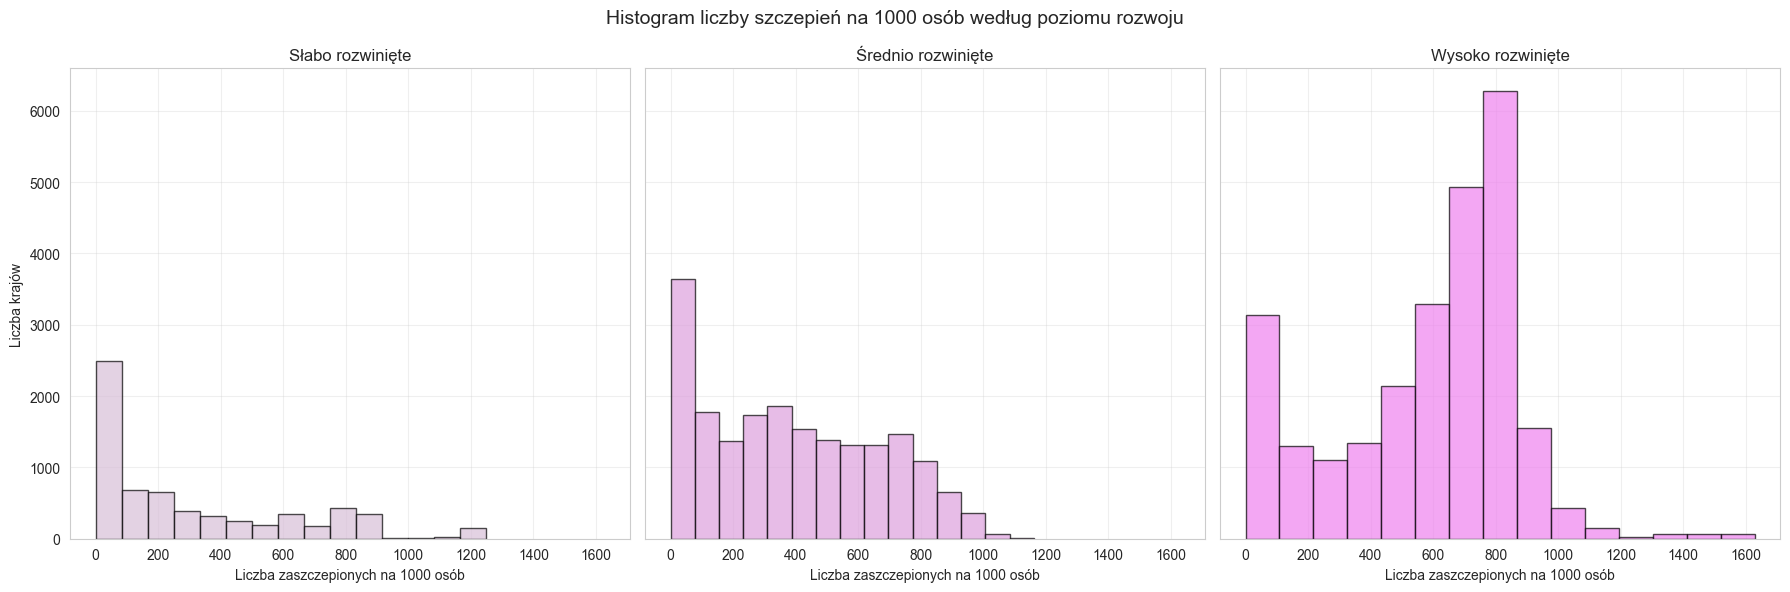

In [255]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)

colors = ['thistle', 'plum', 'violet']
labels = ['Słabo rozwinięte', 'Średnio rozwinięte', 'Wysoko rozwinięte']

for i, ax in enumerate(axes):
    data = df[df['gdp_category'] == i]['vaccinated_per_1000'].dropna()
    ax.hist(data, bins=15, color=colors[i], alpha=0.7, edgecolor='black')
    
    ax.set_title(labels[i])
    ax.set_xlabel('Liczba zaszczepionych na 1000 osób')
    ax.grid(alpha=0.3)

axes[0].set_ylabel('Liczba krajów')
fig.suptitle('Histogram liczby szczepień na 1000 osób według poziomu rozwoju', fontsize=14)

plt.tight_layout()
plt.show()

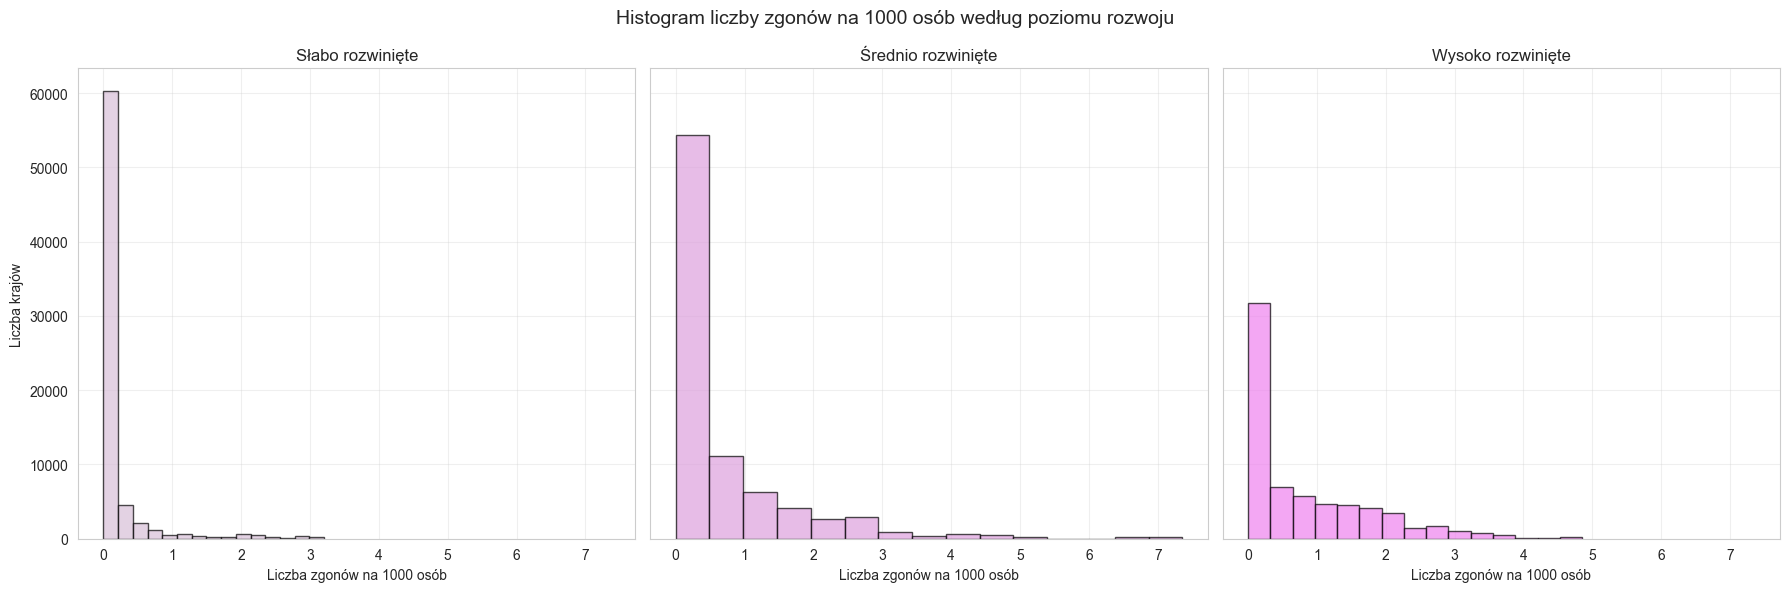

In [256]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)

colors = ['thistle', 'plum', 'violet']
labels = ['Słabo rozwinięte', 'Średnio rozwinięte', 'Wysoko rozwinięte']

for i, ax in enumerate(axes):
    data = df[df['gdp_category'] == i]['deceased_per_1000'].dropna()
    ax.hist(data, bins=15, color=colors[i], alpha=0.7, edgecolor='black')
    
    ax.set_title(labels[i])
    ax.set_xlabel('Liczba zgonów na 1000 osób')
    ax.grid(alpha=0.3)

axes[0].set_ylabel('Liczba krajów')
fig.suptitle('Histogram liczby zgonów na 1000 osób według poziomu rozwoju', fontsize=14)

plt.tight_layout()
plt.show()